### <font color=green>Machine Learning Model Building</font>
### <font color=green>B.Charan Sai</font>
### <font color=green>19314,CSE-D</font>

### <font color=red>Problem Definition</font>

##### <font color=black>Credit cards have been viewed as a competitive banking product which helps to improve a bank’s financial position.For the convenience of citizens abroad traveling, credit cards were first issued in Taiwan in 1973. In year 2000, electronic payment on the internet have been established, which lead to a rapid expansion of credit card market. Credit card holders from different age groups, different education level, and different gender have different usage behaviors. It is meaningful for banks and financial institutions to investigating the credit card default issue and predicting the default of all clients in various condition.</font>

##### <font color=black>In this paper, we explored the factors influencing the defaults of credit card clients, tried to determine how much each factor contribute to the default of credit card, and proposed a model for predicting default of credit card clients.</font>

### <font color=red>Dataset</font>

* This model aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

* We used the [Credit Card Default payment in Taiwan] (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to predict whether the credit card holders are defaulters or Non-defaulters.

### <font color=red>Prepare Data</font> 

**Data Preprocessing (https://github.com/charansai123/Credit-Default-Prediction/blob/main/Phase%201%20-%2019314.pdf) or(https://bit.ly/3wj3e6D) for this dataset**.

### <font color=red>Python packages</font> 

#### <font color=green>Numpy</font>
* <a href="https://numpy.org/" >Numpy</a> adds multi-dimensional array and matrix processing to Python, as well as a large collection of high-level mathematical functions. It is commonly used for scientific computing and hence, one of the most used Python Packages for machine learning.It also discusses the various array functions, types of indexing, etc.NumPy stands for Numerical Python.

#### <font color=green>Pandas</font>
* <a href="https://pandas.pydata.org/" >Pandas</a> is a Python library for providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.pandas is a software library for data manipulation and analysis.It is a library used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating data.

#### <font color=green>Matplotlib </font>
* <a href="https://matplotlib.org/" >Matplotlib</a> is an interactive, cross-platform library for two-dimensional plotting.It is a low level graph plotting library in python that serves as a visualization utility.It can produce high-quality graphs, charts and plots in several hardcopy formats.It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK

#### <font color=green>Seaborn</font>
* <a href="https://seaborn.pydata.org/" >Seaborn</a> is a library for making statistical graphs in Python. It is built on top of matplotlib and also integrated with pandas data structures.Gives more attractive graphs than matplotlib.Has built-in plots that matplotlib lacks.Uses less code to visualize graphs.It provides a high-level interface for drawing attractive and informative statistical graphics.

#### <font color=green>Scikit-Learn</font>
* <a href="https://scikit-learn.org/stable/" >Scikit-Learn (Sklearn)</a> is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib. 

### <font color=red>Machine learning Model Building</font> 

### Step 1:Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Step 2:Reading Preprocessed data

In [3]:
data=pd.read_csv('Cleaned_data.csv')
data.head()

,Unnamed: 0,bill_tot,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,...,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Target
0,0,7704.0,1,20000.0,2,2,1,8,2,2,...,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1
1,1,17077.0,2,120000.0,2,2,2,8,-1,2,...,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,2,101653.0,3,90000.0,2,2,2,6,0,0,...,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,3,231334.0,4,50000.0,2,2,1,6,0,0,...,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,4,109339.0,5,50000.0,1,2,1,3,-1,0,...,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data=data.iloc[: , 1:]
data.head()

,bill_tot,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Target
0,7704.0,1,20000.0,2,2,1,8,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1
1,17077.0,2,120000.0,2,2,2,8,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,101653.0,3,90000.0,2,2,2,6,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,231334.0,4,50000.0,2,2,1,6,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,109339.0,5,50000.0,1,2,1,3,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
print("No of rows: ",data.shape[0])
print("No of rows: ",data.shape[1])

No of rows:  30000
No of rows:  20


### Step 3:Feature scaling of numerical attributes

In [6]:
col_to_norm = ['LIMIT_BAL','bill_tot', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
data[col_to_norm] = data[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))
data.head()

,bill_tot,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Target
0,-0.690692,1,-1.136720,2,2,1,8,2,2,-1,-1,-2,-2,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.665997,2,-0.365981,2,2,2,8,-1,2,0,0,0,2,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.443170,3,-0.597202,2,2,2,6,0,0,0,0,0,0,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.101507,4,-0.905498,2,2,1,6,0,0,0,0,0,0,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.422920,5,-0.905498,1,2,1,3,-1,0,-1,0,0,0,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


### Step 4: Spiliting Dataset into training(70%) and test set(30%)

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

### Step 5: Applying Machine Learning Algorithms for Classification Problem

### 1)Logistic Regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [9]:
# Logistic regression User Defined
class logistic_regression:
    def __init__(self,x,y): 
        self.intercept = np.ones((x.shape[0], 1))
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
 
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
 
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
 
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma,self.y)
            dW = self.gradient_descent(self.x , sigma, self.y)
            #Updating the weights
            self.weight -= lr * dW
        return print('Working successfully')
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i].any() == True:
                y_pred[i] = 1
            else:
                continue
 
        return y_pred

In [10]:
regressor = logistic_regression(X,y)
regressor.fit(0.1 , 5000)
pred_lr = regressor.predict(X,0.5)

Working successfully


In [11]:
roc=roc_auc_score(y, pred_lr)
acc = accuracy_score(y, pred_lr)
prec = precision_score(y, pred_lr)
rec = recall_score(y, pred_lr)
f1 = f1_score(y, pred_lr)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.7788,0.0,0.0,0.0,0.5


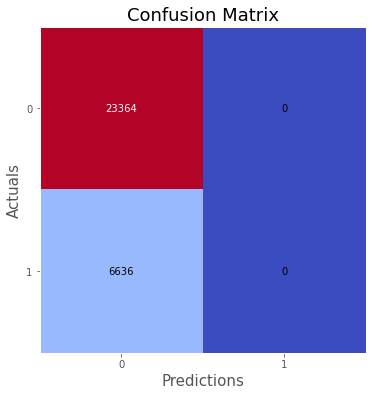

In [12]:
cm = confusion_matrix(y, pred_lr)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="coolwarm")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

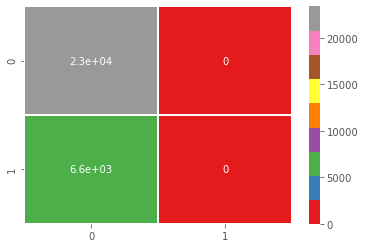

In [13]:
cm = confusion_matrix(y, pred_lr)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.Set1)

#### Built in Logistic Regression method

In [14]:
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train,y_train)
y_pred_lr = logmodel.predict(X_test)

In [15]:
roc=roc_auc_score(y_test, y_pred_lr)
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.804778,0.685496,0.2245,0.33823,0.597536


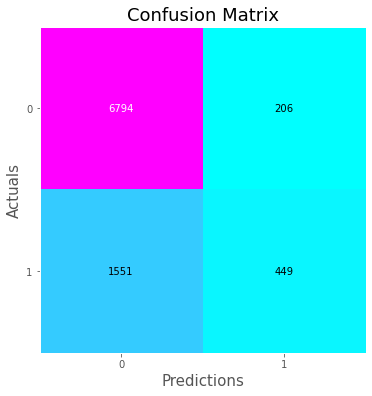

In [16]:
cm = confusion_matrix(y_test, y_pred_lr)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="cool")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

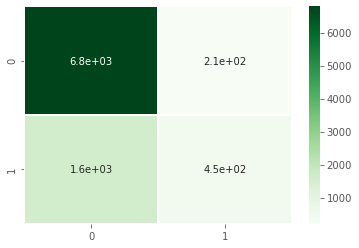

In [17]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.Greens)

### 2)Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [18]:
scv = SVC(kernel = 'rbf', random_state = 42)
scv.fit(X_train, y_train)
y_pred_svm = scv.predict(X_test)

In [19]:
roc=roc_auc_score(y_test, y_pred_svm)
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results = results.append(model, ignore_index = True)

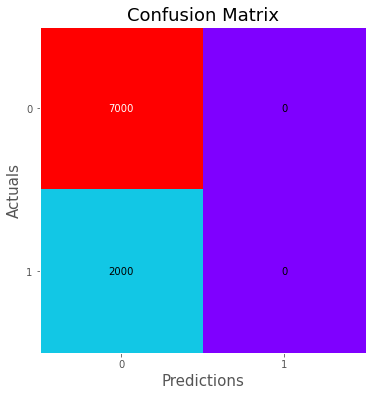

In [20]:
cm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="rainbow")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

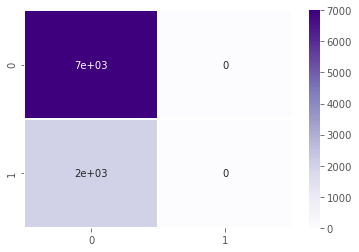

In [21]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.Purples)

### 3)Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [22]:
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

In [23]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results = results.append(model, ignore_index = True)

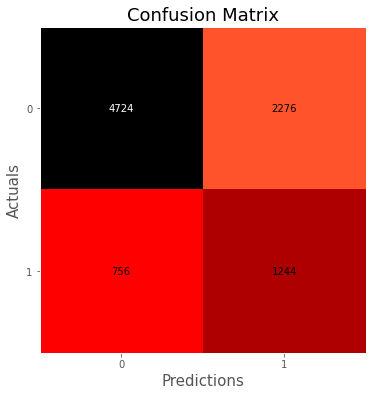

In [24]:
cm = confusion_matrix(y_test, y_pred_sgd)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="flag")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

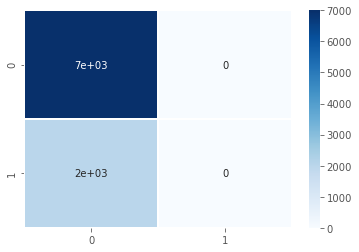

In [25]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.Blues)

### 4)K-Nearest Neighbour
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.
We can implement a KNN model by following the below steps:
* Load the data
* Initialise the value of k
* For getting the predicted class, iterate from 1 to total number of training data points
* Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance  metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
* Sort the calculated distances in ascending order based on distance values
* Get top k rows from the sorted array
* Get the most frequent class of these rows
* Return the predicted class

Text(0, 0.5, 'Error Rate')

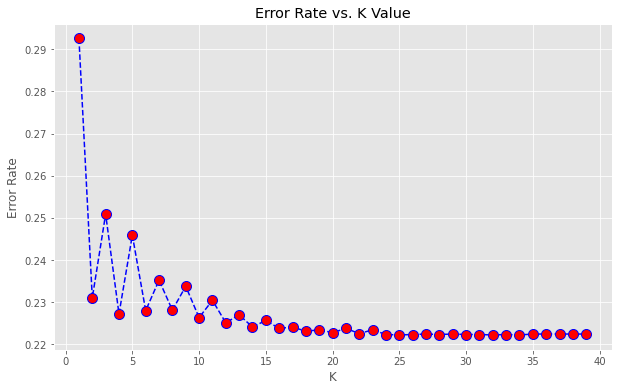

In [26]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Correct predictions for k = 11 : 6926
Correct predictions for k = 32 : 7000
Correct predictions for k = 14 : 6983
Correct predictions for k = 39 : 6998
Correct predictions for k = 22 : 6997
Correct predictions for k = 35 : 6998
Correct predictions for k = 26 : 6999
Correct predictions for k = 18 : 6992
Correct predictions for k = 41 : 6998
Correct predictions for k = 49 : 7000
Correct predictions for k = 14 : 6983
Correct predictions for k = 23 : 6989
Correct predictions for k = 36 : 6998
Correct predictions for k = 30 : 6999
Correct predictions for k = 30 : 6999


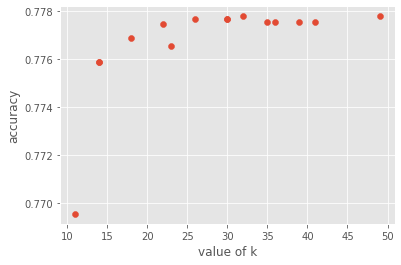

In [27]:
accuracies = []
kvalues = []
for x in range(15):
    k = np.random.randint(1,50)
    kvalues.append(k)
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test,Y_pred)
    print('Correct predictions for k =',k,':',np.sum(np.array([confusion_matrix(y_test,Y_pred)[x][x] for x in range(2)])))
    accuracies.append((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
plt.scatter(kvalues,accuracies)
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [29]:
roc=roc_auc_score(y_test, y_pred_knn)
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results = results.append(res, ignore_index = True)

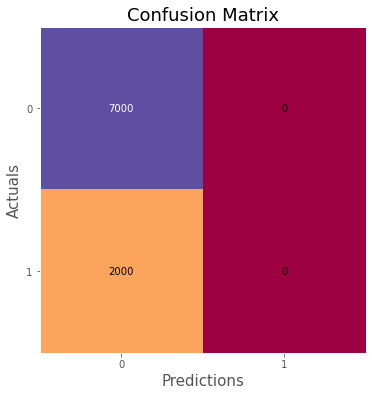

In [30]:
cm = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="Spectral")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

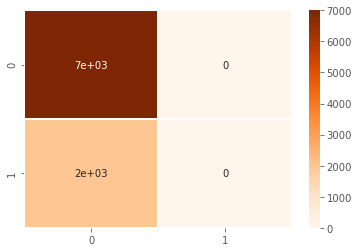

In [31]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.Oranges)

### 5)Gaussian Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes Theorem. There are three types of Naive Bayes models: Gaussian, Multinomial, and Bernoulli. Gaussian Naive Bayes – This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

In [32]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred_nb =naive_bayes.predict(X_test)

In [33]:
roc=roc_auc_score(y_test, y_pred_nb)
acc = accuracy_score(y_test, y_pred_nb)
prec = precision_score(y_test, y_pred_nb)
rec = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results = results.append(model, ignore_index = True)

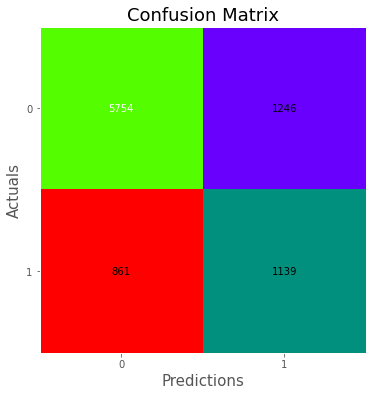

In [34]:
cm = confusion_matrix(y_test, y_pred_nb)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="prism")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

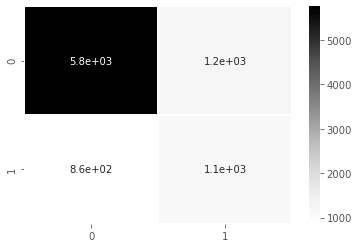

In [35]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.Greys)

### 6)Decision Tree Classification
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

#### Advantages of Decision Trees
Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

#### Disadvantages of Decision Trees
Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [36]:
dct = DecisionTreeClassifier(max_depth=3,criterion = 'gini')
dct.fit(X_train,y_train)
y_pred_dct = dct.predict(X_test)

In [37]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
results = results.append(model, ignore_index = True)

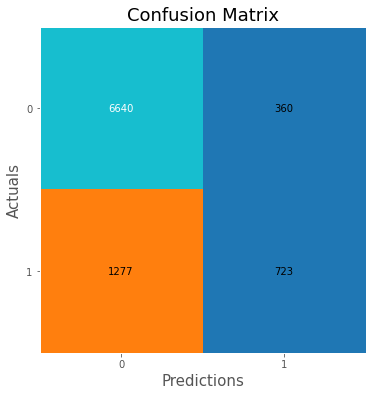

In [38]:
cm = confusion_matrix(y_test, y_pred_dct)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="tab10")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

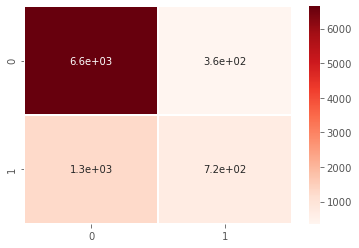

In [39]:
cm = confusion_matrix(y_test, y_pred_dct)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.Reds)

### 7)Random Forest Classification
Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

##### Step1 
Pick at random K data points from the training set

##### Step2
Build the Decision tree associated to these K data points

##### Step3
Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

##### Step4
For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [40]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [41]:
roc=roc_auc_score(y_test, y_pred_rfc)
acc = accuracy_score(y_test, y_pred_rfc)
prec = precision_score(y_test, y_pred_rfc)
rec = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)

model = pd.DataFrame([['Random Forest Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

results = results.append(model, ignore_index = True)

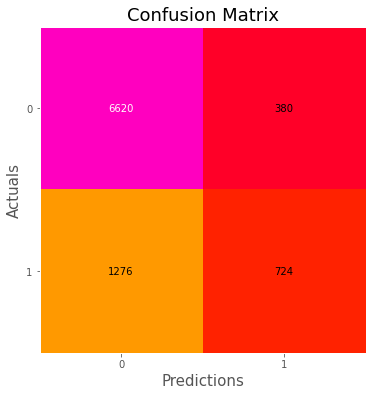

In [42]:
cm = confusion_matrix(y_test, y_pred_rfc)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="gist_rainbow")
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<AxesSubplot:>

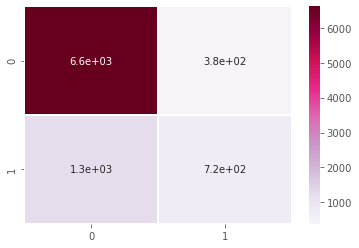

In [43]:
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm,annot= True,linewidths=1,cmap=plt.cm.PuRd)

In [44]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.804778,0.685496,0.2245,0.338230,0.597536
1,Support Vector Machine,0.777778,0.000000,0.0000,0.000000,0.500000
2,Stochastic Gradient Descent,0.663111,0.353409,0.6220,0.450725,0.648429
3,K-Nearest Neighbour,0.777778,0.000000,0.0000,0.000000,0.500000
4,Gaussian Naive Bayes,0.765889,0.477568,0.5695,0.519498,0.695750
5,Decision Tree Classifier,0.818111,0.667590,0.3615,0.469024,0.655036
6,Random Forest Classifier,0.816000,0.655797,0.3620,0.466495,0.653857


### Step6 : Model Optimization using K-Fold Cross validation
### Stratified K-Fold Cross-validation
The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.

Specifically, we can split a dataset randomly, although in such a way that maintains the same class distribution in each subset. This is called stratification or stratified sampling and the target variable (y), the class, is used to control the sampling process.

##### Stratified K-Fold works well on Imbalenced Datsets

In [45]:
skf = StratifiedKFold(n_splits=10, random_state=None)
for train_index, test_index in skf.split(X,y):
    X_train_skf, X_test_skf = X[train_index], X[test_index]
    y_train_skf, y_test_skf = y[train_index], y[test_index]

#### 1)Stratified K-Fold on Logistic Regression Model

In [46]:
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train_skf,y_train_skf)
y_pred_lr_skf = logmodel.predict(X_test_skf)

roc=roc_auc_score(y_test_skf, y_pred_lr_skf)
acc = accuracy_score(y_test_skf, y_pred_lr_skf)
prec = precision_score(y_test_skf, y_pred_lr_skf)
rec = recall_score(y_test_skf, y_pred_lr_skf)
f1 = f1_score(y_test_skf, y_pred_lr_skf)
skf_results = pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

#### 2)Stratified K-Fold on Support Vector Machine

In [47]:
scv = SVC(kernel = 'rbf', random_state = 42)
scv.fit(X_train_skf, y_train_skf)
y_pred_svm_skf = scv.predict(X_test_skf)

roc=roc_auc_score(y_test_skf, y_pred_svm_skf)
acc = accuracy_score(y_test_skf, y_pred_svm_skf)
prec = precision_score(y_test_skf, y_pred_svm_skf)
rec = recall_score(y_test_skf, y_pred_svm_skf)
f1 = f1_score(y_test_skf, y_pred_svm_skf)
skf_model = pd.DataFrame([['Support Vector Machine Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

#### 3)Stratified K-Fold on Stochastic Gradient Descent

In [48]:
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train_skf, y_train_skf)
y_pred_sgd_skf = sgd.predict(X_test_skf)

roc=roc_auc_score(y_test_skf, y_pred_sgd_skf)
acc = accuracy_score(y_test_skf, y_pred_sgd_skf)
prec = precision_score(y_test_skf, y_pred_sgd_skf)
rec = recall_score(y_test_skf, y_pred_sgd_skf)
f1 = f1_score(y_test_skf, y_pred_sgd_skf)
skf_model = pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

#### 4)Stratified K-Fold on K-Nearest Neighbour

In [49]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train_skf,y_train_skf)
y_pred_knn_skf = knn.predict(X_test_skf)

roc=roc_auc_score(y_test_skf, y_pred_knn_skf)
acc = accuracy_score(y_test_skf, y_pred_knn_skf)
prec = precision_score(y_test_skf, y_pred_knn_skf)
rec = recall_score(y_test_skf, y_pred_knn_skf)
f1 = f1_score(y_test_skf, y_pred_knn_skf)
skf_model = pd.DataFrame([['K-Nearest Neighbour Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

#### 5)Stratified K-Fold on Gaussian Naive Bayes

In [50]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_skf,y_train_skf)
y_pred_nb_skf =naive_bayes.predict(X_test_skf)

roc=roc_auc_score(y_test_skf, y_pred_nb_skf)
acc = accuracy_score(y_test_skf, y_pred_nb_skf)
prec = precision_score(y_test_skf, y_pred_nb_skf)
rec = recall_score(y_test_skf, y_pred_nb_skf)
f1 = f1_score(y_test_skf, y_pred_nb_skf)
skf_model = pd.DataFrame([['Gaussian Naive Bayes Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

#### 6)Stratified K-Fold on Decsion Tree Classifier

In [51]:
dct = DecisionTreeClassifier(max_depth=3,criterion = 'gini')
dct.fit(X_train_skf,y_train_skf)
y_pred_dct_skf = dct.predict(X_test_skf)

roc=roc_auc_score(y_test_skf, y_pred_dct_skf)
acc = accuracy_score(y_test_skf, y_pred_dct_skf)
prec = precision_score(y_test_skf, y_pred_dct_skf)
rec = recall_score(y_test_skf, y_pred_dct_skf)
f1 = f1_score(y_test_skf, y_pred_dct_skf)
skf_model = pd.DataFrame([['Decision Tree Classifier Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

#### 7)Stratified K-Fold on Random Forest Classifier

In [52]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train_skf,y_train_skf)
y_pred_rfc_skf = rfc.predict(X_test_skf)

roc=roc_auc_score(y_test_skf, y_pred_rfc_skf)
acc = accuracy_score(y_test_skf, y_pred_rfc_skf)
prec = precision_score(y_test_skf, y_pred_rfc_skf)
rec = recall_score(y_test_skf, y_pred_rfc_skf)
f1 = f1_score(y_test_skf, y_pred_rfc_skf)
skf_model = pd.DataFrame([['Random Forest Classifier Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
skf_results = skf_results.append(skf_model, ignore_index = True)

In [53]:
skf_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression Tuned,0.804000,0.700535,0.197587,0.308235,0.586812
1,Support Vector Machine Tuned,0.779000,0.000000,0.000000,0.000000,0.500000
2,Stochastic Gradient Descent Tuned,0.782667,0.823529,0.021116,0.041176,0.509916
3,K-Nearest Neighbour Tuned,0.779000,0.000000,0.000000,0.000000,0.500000
4,Gaussian Naive Bayes Tuned,0.777667,0.497436,0.585219,0.537769,0.708741
5,Decision Tree Classifier Tuned,0.824667,0.704478,0.355958,0.472946,0.656798
6,Random Forest Classifier Tuned,0.820667,0.661499,0.386124,0.487619,0.665034


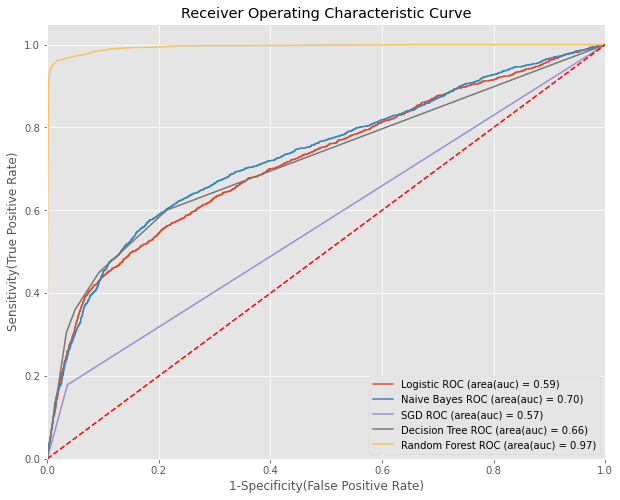

In [54]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p =logmodel.predict_proba(X_test)[:,1]
y_pred_nb_p =naive_bayes.predict_proba(X_test)[:,1]
y_pred_sgd_p =sgd.predict_proba(X_test)[:,1]
y_pred_dct_p =dct.predict_proba(X_test)[:,1]
y_pred_rfc_p =rfc.predict_proba(X_test)[:,1]

model = [logmodel,naive_bayes,sgd,dct,rfc]

models=[y_pred_log_p,y_pred_nb_p,y_pred_sgd_p,y_pred_dct_p,y_pred_rfc_p]
label=['Logistic','Naive Bayes','SGD','Decision Tree','Random Forest']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(5)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area(auc) = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('SGD',SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
column_names = ["Model","mean accuracy", "standard deviation accuracy"]
df = pd.DataFrame(columns = column_names)
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    df_model = pd.DataFrame([[name,cv_results.mean(),cv_results.std()]],
               columns = ["Model","mean accuracy", "standard deviation accuracy"])
    df = df.append(df_model, ignore_index = True)
df

,Model,mean accuracy,standard deviation accuracy
0,LR,0.803567,0.011901
1,SVM,0.778800,0.017234
2,SGD,0.779733,0.016753
3,KNN,0.721467,0.111097
4,NB,0.759567,0.020673
5,CART,0.718167,0.028652
6,RFC,0.816733,0.015734


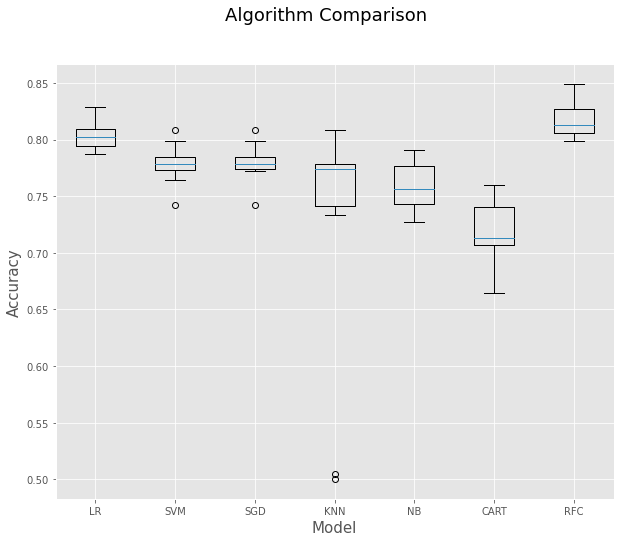

In [59]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Algorithm Comparison',fontsize=18)
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Model', fontsize=15)
ax.set_xticklabels(names)
plt.show()

### Conclusion
1)Using a **Logistic Regression**  classifier, we can predict with **80.4% accuracy**, whether a customer is likely to default next month or not.

2)Using a **Support Vector Machine**  classifier, we can predict with **77.9% accuracy**, whether a customer is likely to default next month or not.

3)Using a **Stochastic Gradient Descent**  classifier, we can predict with **78.26% accuracy**, whether a customer is likely to default next month or not.

4)Using a **K-Nearest Neighbour**  classifier, we can predict with **77.9% accuracy**, whether a customer is likely to default next month or not.

5)Using a **Gaussain Naive Bayes**  classifier, we can predict with **77.76% accuracy**, whether a customer is likely to default next month or not.

6)Using a **Decision Tree classifier**, we can predict with **82.43% accuracy**, whether a customer is likely to default next month or not.

7)Using a **Random Forest classifier**, we can predict with **82.06% accuracy**, whether a customer is likely to default next month or not.


The strongest predictors of default are the **PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months)**.

**We found that for this data Decision Tree,Logistic Regression and Random Forest Classifier are better.**